In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.cm as cm

In [3]:
### filepaths go here 
### csv with first colum as q-values and following columns are integrations
### top row of csv should be film thickness in nm

#filepath = r"/home/goughl/Documents/beamtime_data/2504_GIWAXS_ALS/rylene_project/all_int_DCV4T_50_IP.csv"


df = pd.read_csv(filepath, skiprows=[1])

# set x-axis colunm as the index (q-values)
df.set_index(df.columns[0], inplace=True)

# get the background column (first dataset column, first integration in an in situ run)
background = df.iloc[:, 0]

###subtract the background from all datasets
adjusted_df = df.sub(background, axis=0)

In [4]:
# ### plotting the data with no manipulation 

# plt.figure(figsize=(10, 6))

# for column in df.columns:
#     plt.plot(df.index, df[column], label=column)

# plt.xlabel("Q (1/Å)")
# plt.ylabel("Intensity (a.u.)")
# plt.legend()
# plt.grid(True)
# plt.show()

/tmp/ipykernel_20367/1089440108.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Blues')(np.linspace(0.3, 1, num_cols)) ## change 'Blues' to different colour


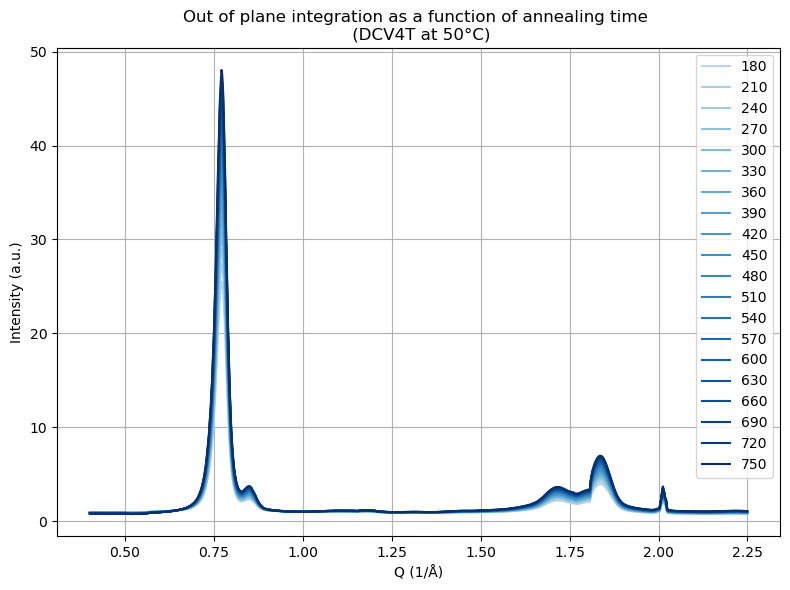

In [7]:
### plotting in situ integrations as colour gradient

### run this block before the next one otherwise you'll get an error about colour scales
### if that happens just restart the kernal and run all the cells from the top in order


filepath = r"/home/goughl/Documents/beamtime_data/2504_GIWAXS_ALS/rylene_project/all_int_NTCDA_DCV4T_50_OoP.csv"
df = pd.read_csv(filepath, skiprows=[1])

# set q-values as index
df.set_index(df.columns[0], inplace=True)

##########optional: subtract background (first column)
# background = df.iloc[:, 0]     ### uncomment this line and line below to remove first dataset as background
# df = df.sub(background, axis=0)


num_cols = len(df.columns)
colors = cm.get_cmap('Blues')(np.linspace(0.3, 1, num_cols)) ## change 'Blues' to different colour


plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'sans-serif']
for col, color in zip(df.columns, colors):
    plt.plot(df.index, df[col], label=col, color=color)

plt.xlabel("Q (1/Å)")
plt.ylabel("Intensity (a.u.)")
plt.title("Out of plane integration as a function of annealing time \n (DCV4T at 50°C)")
plt.legend()


plt.grid(True)

plt.tight_layout()
plt.show()

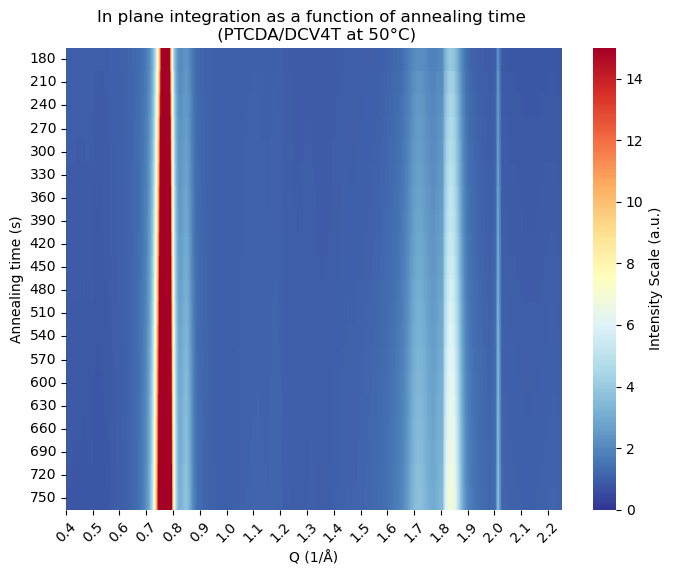

In [86]:
### customisable heatmap

# can shift all the datasets by an increment here
#shifted_df = adjusted_df + 0.05

#shifted_df.to_csv('/home/goughl/Documents/EA_paper_working/EA_DCV5T_RT_thickfilm/bg_removed_thick_OoP.csv', index=False)

 # change cmap='viridis' to chane to s
cm = plt.cm.RdYlBu_r
cm.set_bad(cm(0))  # Set 'bad' values to a specific color



# to plot only a certain range of q values change these two numbers and uncomment
#shifted_df = adjusted_df[(adjusted_df.index >= 0.5) & (adjusted_df.index <= 1.25)]

# select only the range of datasets between 0 - 50 nm

plt.figure(figsize=(8, 6))

# change vmin and vmax to change the scale range
sns.heatmap(df.T, cmap=cm, cbar_kws={'label': 'Intensity Scale (a.u.)'},
            vmin=0, vmax=15)

plt.xlabel("Q (1/Å)")
plt.ylabel("Annealing time (s)")
plt.title("In plane integration as a function of annealing time \n (PTCDA/DCV4T at 50°C)")

x_values = df.index 
plt.xticks(
    np.arange(0, len(x_values), int(0.1 / (x_values[1] - x_values[0]))),
    labels=np.round(x_values[::int(0.1 / (x_values[1] - x_values[0]))], 1),
    rotation=45
)

plt.show()
